## Date: 10th Jan 22

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read csv data and parse date column as a date datatype
df = pd.read_csv('C:\\Users\\user\\Documents\\MSC AI\\Python\\Data Analysis with Python freecodecamp\\sales_data.csv', parse_dates = ['Date'])

In [3]:
#explore the data
print(df.dtypes)
df.info
df.shape
df.describe()

Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Age_Group                   object
Customer_Gender             object
Country                     object
State                       object
Product_Category            object
Sub_Category                object
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Cost                         int64
Revenue                      int64
dtype: object


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [4]:
#explore unit cost
df.Unit_Cost.describe()
#median unit cost
print(df['Unit_Cost'].median())

9.0


<AxesSubplot:>

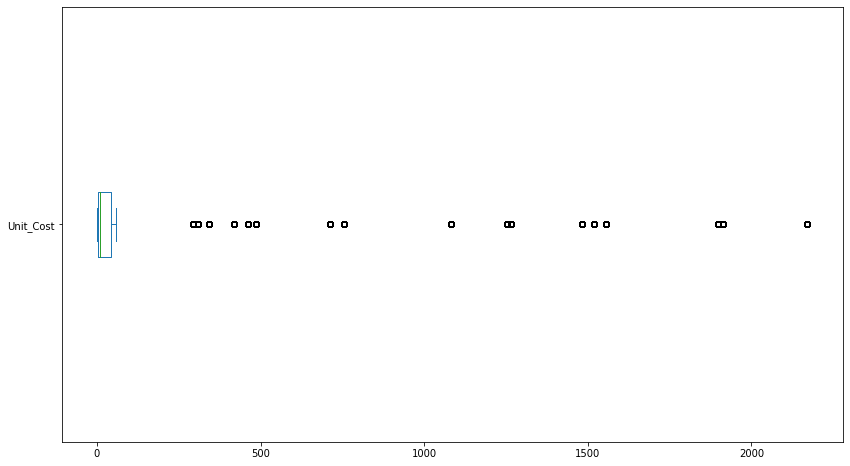

In [5]:
#boxplot to check outliers
# wiskers denote the first and third quartile and the green line is the median, i.e., 9 in this case
# outside the box plot wisker (right most representing the 3rd quartile) are the outliers
df['Unit_Cost'].plot(kind='box', vert = False, figsize=(14,8))

<AxesSubplot:ylabel='Density'>

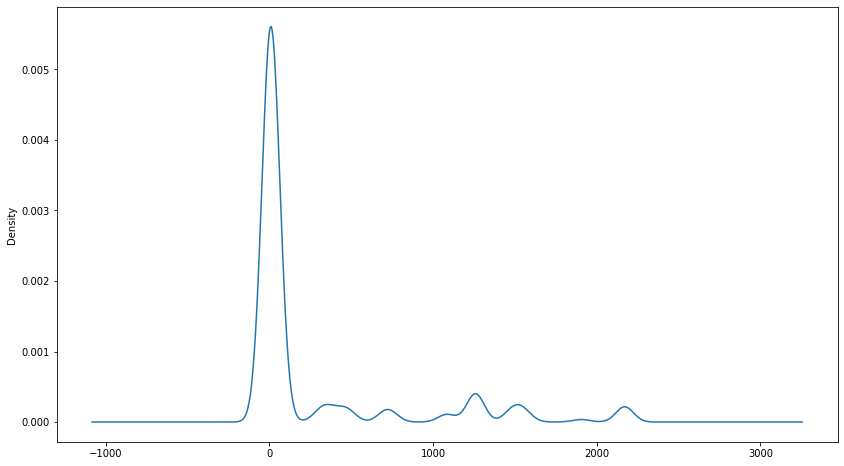

In [6]:
#density plot for checking the distribution of unit cost
df['Unit_Cost'].plot(kind='density', figsize = (14, 8))

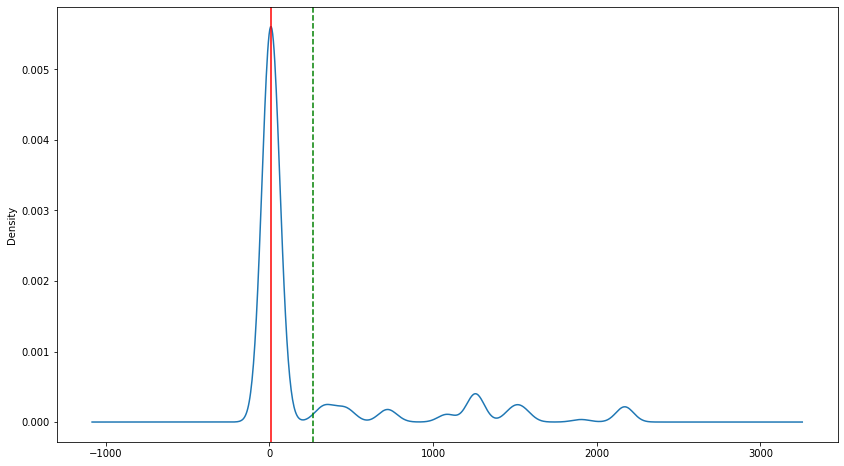

In [7]:
#density plot along with mean and median marked
ax = df['Unit_Cost'].plot(kind='density', figsize = (14, 8))
ax.axvline(df['Unit_Cost'].mean(), color = 'green', linestyle='dashed')
ax.axvline(df['Unit_Cost'].median(), color = 'red')

<AxesSubplot:ylabel='Frequency'>

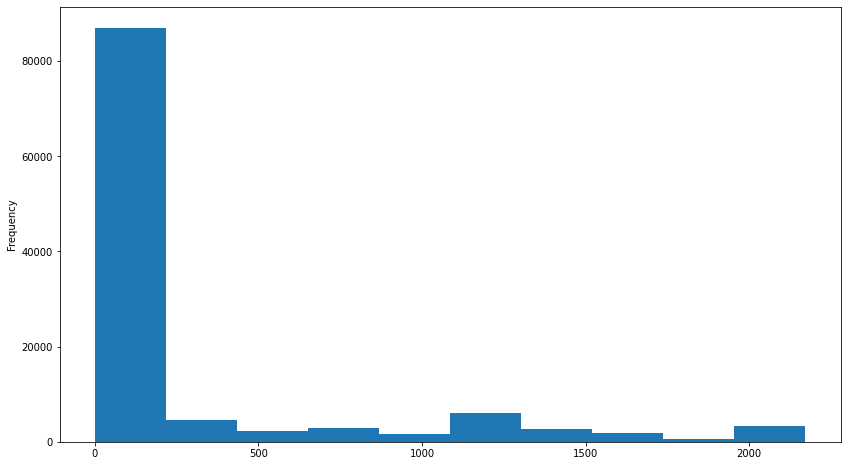

In [8]:
df['Unit_Cost'].plot(kind='hist', figsize = (14, 8))

<AxesSubplot:ylabel='Sales'>

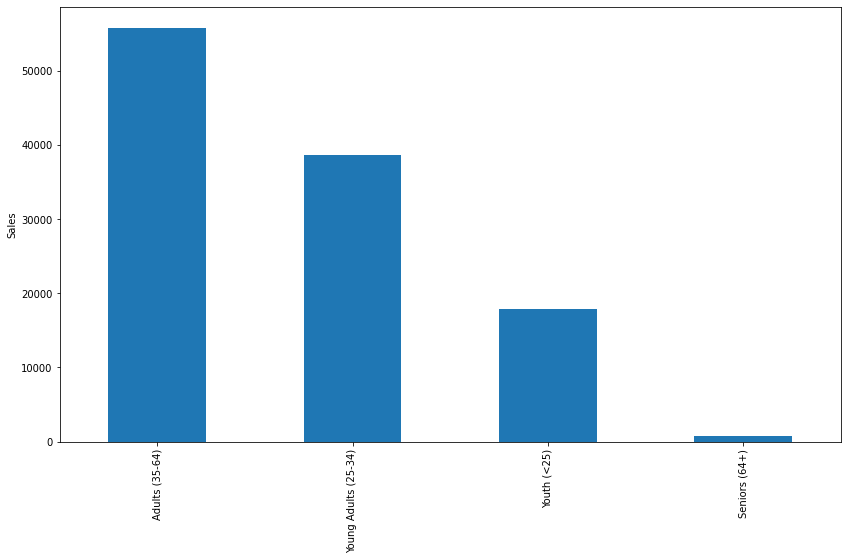

In [9]:
#explore age group variable
df['Age_Group'].value_counts().plot(kind='bar', figsize= (14,8), ylabel = 'Sales')

## Date: 13th Jan 22

In [10]:
#correlation between variables 
corr = df.corr()

([<matplotlib.axis.YTick at 0x2627c653400>,
 [Text(0, 0, 'Day'),
  Text(0, 1, 'Year'),
  Text(0, 2, 'Customer_Age'),
  Text(0, 3, 'Order_Quantity'),
  Text(0, 4, 'Unit_Cost'),
  Text(0, 5, 'Unit_Price'),
  Text(0, 6, 'Profit'),
  Text(0, 7, 'Cost'),
  Text(0, 8, 'Revenue')])

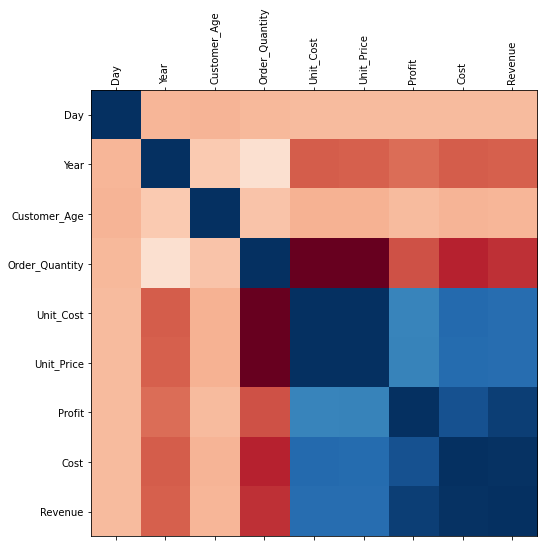

In [11]:
fig = plt.figure(figsize = (8,8))
plt.matshow(corr, cmap ='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

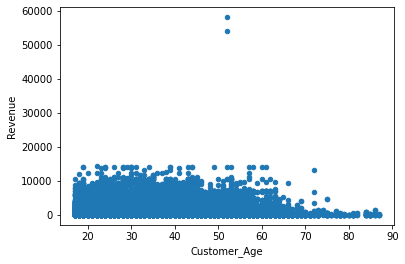

In [12]:
df.plot(kind = 'scatter', x = 'Customer_Age', y = 'Revenue')

Text(0, 0.5, 'Profit')

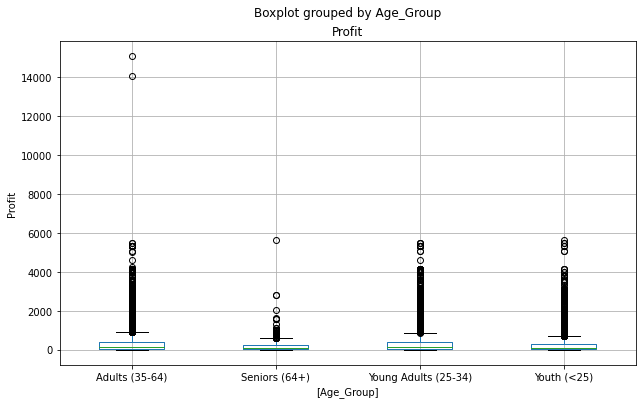

In [13]:
ax = df[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10, 6))
ax.plot()
ax.set_ylabel('Profit')

Customer_Age       AxesSubplot(0.125,0.536818;0.227941x0.343182)
Profit          AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Unit_Price      AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Revenue               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Cost          AxesSubplot(0.398529,0.125;0.227941x0.343182)
Cost               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

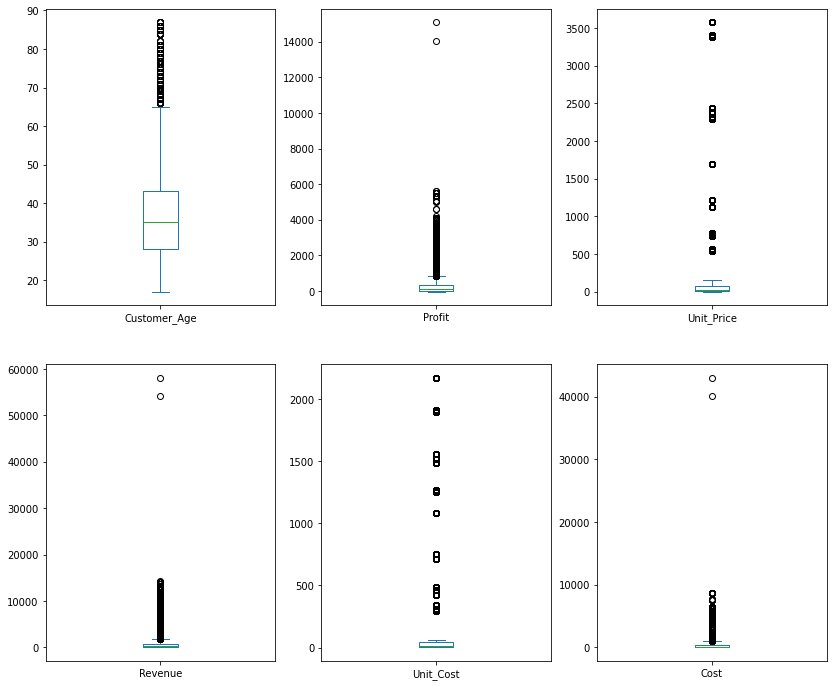

In [14]:
boxplot = ['Customer_Age', 'Profit', 'Unit_Price', 'Revenue', 'Unit_Cost', 'Cost']
df[boxplot].plot(kind = 'box', subplots=True, layout=(2,3), figsize = (14,12))

## Filtering data***

In [15]:
df.Country.value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

In [21]:
df.loc[df['Country'] == 'Canada']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
14,2013-08-02,2,August,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,369,225,594
15,2015-08-02,2,August,2015,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,517,315,832
16,2013-09-02,2,September,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,148,90,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112885,2016-07-05,5,July,2016,38,Adults (35-64),M,Canada,British Columbia,Clothing,Vests,"Classic Vest, L",14,24,64,551,336,887
112952,2013-08-18,18,August,2013,31,Young Adults (25-34),F,Canada,British Columbia,Clothing,Vests,"Classic Vest, L",13,24,64,512,312,824
112953,2015-08-18,18,August,2015,31,Young Adults (25-34),F,Canada,British Columbia,Clothing,Vests,"Classic Vest, L",11,24,64,433,264,697
112954,2013-09-21,21,September,2013,31,Young Adults (25-34),F,Canada,British Columbia,Clothing,Vests,"Classic Vest, L",15,24,64,590,360,950


In [17]:
df.Age_Group.value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

In [18]:
df.loc[df['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

## Date: 18th Jan

In [30]:
#calculate the avg revenue of men between the age of 35 and 64
df.loc[(df['Customer_Gender'] == 'M') &  (df['Age_Group'] == 'Adults (35-64)'), 'Revenue'].mean()

752.5421550628442

In [31]:
df.loc[df['Country'] == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [39]:
df.loc[df['Country'] == 'France', 'Revenue'] += 100

In [40]:
df.loc[df['Country'] == 'France', 'Revenue'].head()

50    281.797
51    281.797
52    783.067
53    758.581
60    244.606
Name: Revenue, dtype: float64